In [25]:
import numpy as np
import matplotlib.pyplot as plt

n_trials = 10000
eps = 0.01 # lesser than this explore
bandit_prob = [0.2,0.5,0.8]

In [16]:
class Bandit:
    """
    This is the class for storing the Action object
    """
    def __init__(self,p):
        self.p = p #True prob - will be given to you
        self.p_estimate = 0. # Estimated prob - start with zero as we don't know what to start with - Q n+1
        self.N = 0.
        
    def pull(self):
        return np.random.random() < self.p
        
    def update(self, x):
        # x is the reward r
        self.N += 1 # Number of times a particular action has been taken
        self.p_estimate = self.p_estimate + (1/self.N)*(x - self.p_estimate)

        

In [19]:
def experiment():
    bandits = [Bandit(p) for p in bandit_prob] # assign initial probs to bandits
    rewards = np.zeros(n_trials)
    n_explored = 0
    n_exploited = 0
    n_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print(optimal_j)

    for i in range(n_trials):
        if np.random.random() <eps:
            #exploration
            n_explored +=1
            j = np.random.randint(len(bandits))
        else:
            #exploitation
            n_exploited +=1
            j = np.argmax([b.p_estimate for b in bandits])
        if j == optimal_j:
            n_optimal +=1 # just see when optimal choices have been made

        x = bandits[j].pull()
        rewards[i] = x
        bandits[j].update(x)

    for b in bandits:
        print('mean estimate: ', b.p_estimate)

    print('total reward:', rewards.sum())
    print(f'no of explorations {n_explored}')
    print(f'no of exploitations: {n_exploited}')
    print(f'total {n_explored + n_exploited}')
    print(f'no of optimal bandits selected: {n_optimal}')

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards/(np.arange(n_trials)+1)
    plt.plot(win_rates)
    plt.plot(np.ones(n_trials)*np.max(bandit_prob))
            

2
mean estimate:  0.2004000000000004
mean estimate:  0.0
mean estimate:  0.0
total reward: 2004.0
no of explorations 0
no of exploitations: 10000
total 10000
no of optimal bandits selected: 0


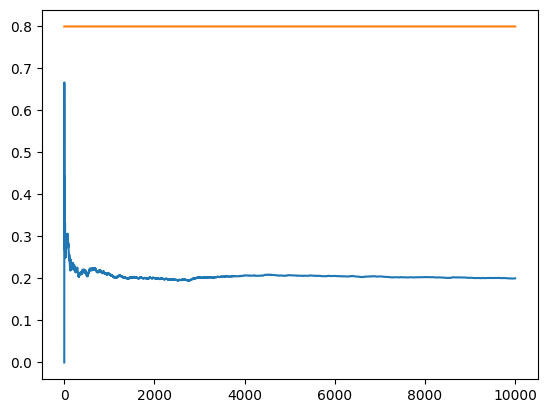

In [22]:
experiment() # eps = 0

2
mean estimate:  0.1612021857923497
mean estimate:  0.529761904761905
mean estimate:  0.8047967304796724
total reward: 7720.0
no of explorations 981
no of exploitations: 9019
total 10000
no of optimal bandits selected: 9298


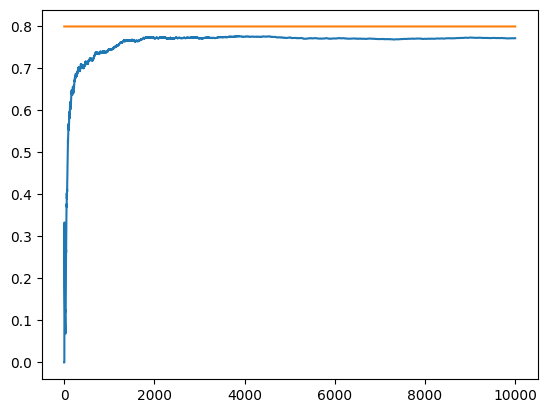

In [24]:
experiment() # eps = 0.1

2
mean estimate:  0.14598540145985403
mean estimate:  0.4952941176470593
mean estimate:  0.7982913569288823
total reward: 7636.0
no of explorations 87
no of exploitations: 9913
total 10000
no of optimal bandits selected: 9013


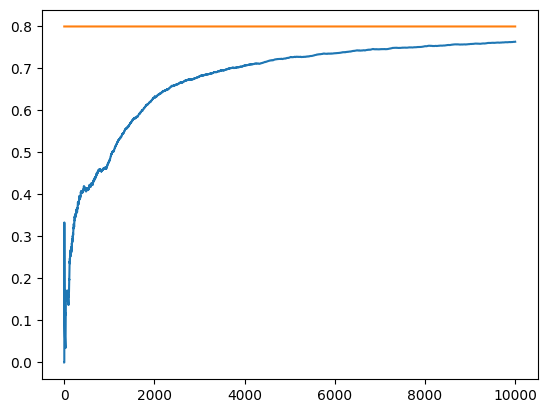

In [26]:
experiment() # eps = 0.01

## Old Implementation

In [9]:
rewards = np.zeros(n_trials)

In [10]:
bandits = [Bandit(b) for b in bandit_prob]

In [11]:
bandits[0].p

0.2

In [12]:
for i in range(n_trials):

    rand = np.random.random()

    if rand<eps:
        action = np.random.choice([0,1,2]) # exploration
    else:
        action = np.argmax([b.p_estimate for b in bandits]) #exploitation

    reward = int(bandits[action].pull()) # reward if True
    bandits[action].update(reward)

    rewards[i] = reward

    

In [40]:
np.argmax([b.p_estimate for b in bandits])

np.int64(2)

In [41]:
bandits[0].p_estimate

0.22739726027397245

In [42]:
rewards

array([0., 0., 1., ..., 1., 1., 1.], shape=(10000,))

In [43]:
cumulative_reward = np.cumsum(rewards)/(np.arange(n_trials) + 1)

In [44]:
import matplotlib.pyplot as plt

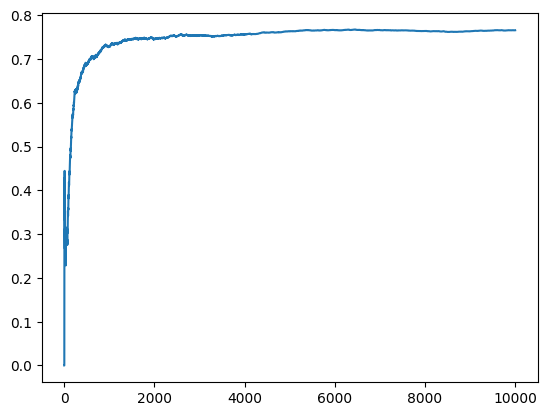

In [45]:
plt.plot(cumulative_reward)


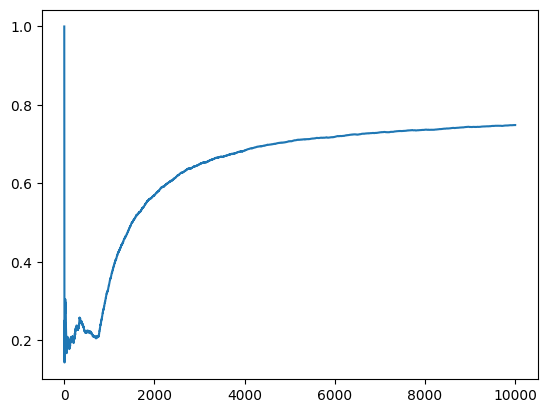

In [34]:
plt.plot(cumulative_reward)


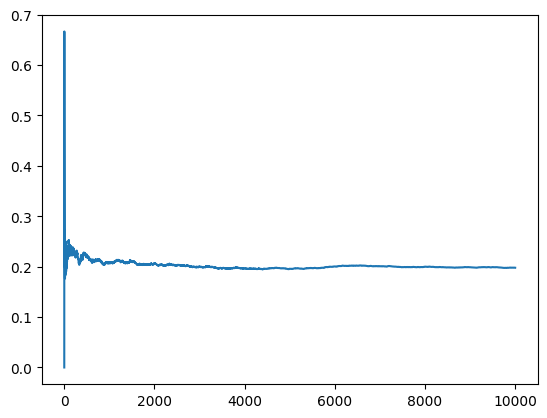

In [22]:
plt.plot(cumulative_reward)
